In [63]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import run_kut4 as rk4
import run_kut5 as rk5
from bulStoer import *

# Problem 1

In [64]:
def F(x, y):
    m = 2
    c = 460
    k = 450
    F1 = y[1]
    F2 = -(k/m)*y[0] - (c/m)*y[1]
    return np.array([F1, F2])

Number of steps RK4: 24
Number of steps RK5: 22


Text(0, 0.5, 'step size')

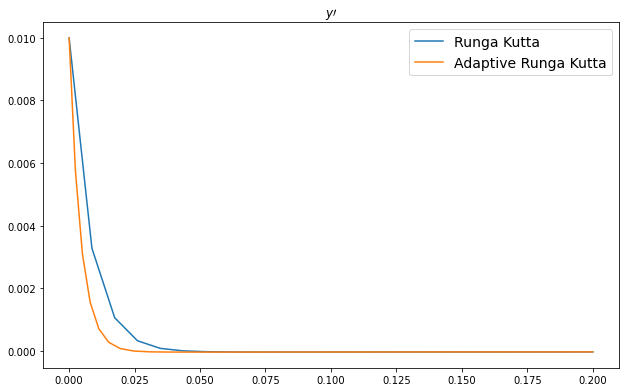

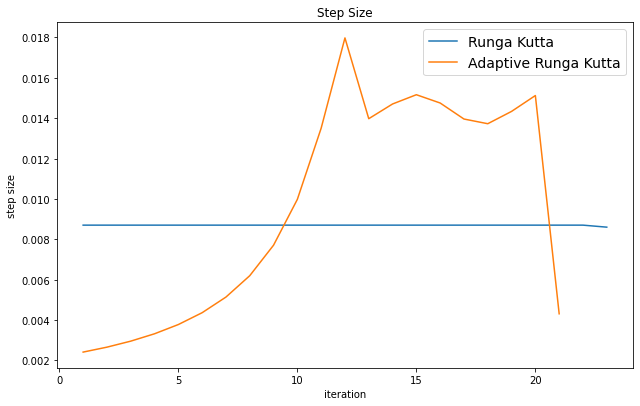

In [65]:
x0 = 0
y0 = np.array([0, 0.01])
xStop = 0.2
h = 0.0087
x, y = rk4.integrate(F, x0, y0, xStop, h)
x1, y1 = rk5.integrate(F, x0, y0, xStop, h)

fig = plt.figure(figsize=(10,6))
axes = fig.add_axes([0.1, 0.1, 0.8, 0.8])
axes.plot(x, y[:, 1], label='Runga Kutta')
axes.plot(x1, y1[:, 1], label='Adaptive Runga Kutta')
axes.legend(loc=1,fontsize=14)
axes.set_title(r'$y\prime$')

print('Number of steps RK4:', len(x))
print('Number of steps RK5:', len(x1))

h0 = []
for i in range(0, len(x)-1):
    h0.append(x[i+1] - x[i])

h1 = []
for i in range(0, len(x1)-1):
    h1.append(x1[i+1] - x1[i])

x0 = np.arange(1, len(h0)+1)
x1 = np.arange(1, len(h1)+1)
fig = plt.figure(figsize=(10,6))
axes = fig.add_axes([0.1, 0.1, 0.8, 0.8])
axes.plot(x0, h0, label='Runga Kutta')
axes.plot(x1, h1, label='Adaptive Runga Kutta')
axes.legend(loc=1,fontsize=14)
axes.set_title('Step Size')
axes.set_xlabel('iteration')
axes.set_ylabel('step size')

# Problem 2

In [55]:
def F(x, y):
    F0 = y[1]
    F1 = -(y[0] / x**2) - (y[1] / x)
    return np.array([F0, F1])

Text(0.5, 1.0, 'solutions')

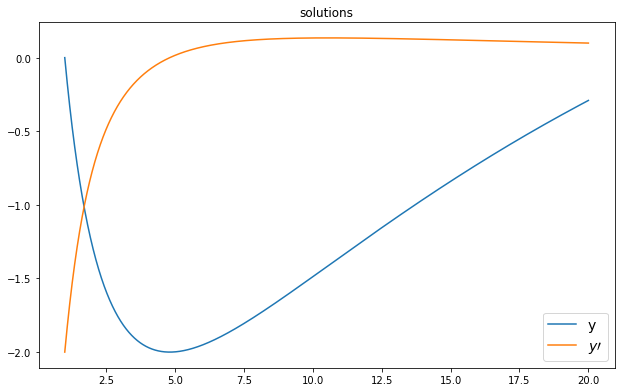

In [56]:
x0 = 1
y0 = np.array([0.0, -2.0])
xStop = 20
H = 0.01
x, y = bulStoer(F,x0,y0,xStop,H)
fig = plt.figure(figsize=(10,6))
axes = fig.add_axes([0.1, 0.1, 0.8, 0.8])
axes.plot(x, y[:, 0], label='y')
axes.plot(x, y[:, 1], label=r'$y\prime$')
axes.legend(loc=4,fontsize=14)
axes.set_title('solutions')

# Problem 3

In [57]:
def F(t, x):
    F0 = x[1]
    F1 = (5/((x[0])**2)) - 120 * (x[0] - 0.2)
    return np.array([F0, F1])

Text(0.5, 1.0, 'solutions')

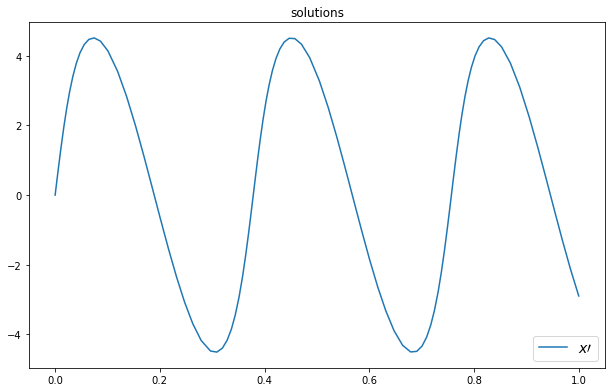

In [58]:
t0 = 0
x0 = np.array([0.2, 0])
tStop = 1
h = 0.01

t, x = rk5.integrate(F, t0, x0, tStop, h)

fig = plt.figure(figsize=(10,6))
axes = fig.add_axes([0.1, 0.1, 0.8, 0.8])
# axes.plot(t, x[:, 0], label='x')
axes.plot(t, x[:, 1], label=r'$x\prime$')
axes.legend(loc=4,fontsize=14)
axes.set_title('solutions')

In [59]:
i = 25
while(x[i, 1] < 0):
    i += 1

print('t =', t[i-1], ': x =', x[i-1])
print('t =', t[i], ': x =', x[i])

m = (x[i, 1] - x[i-1, 1]) / (t[i] - t[i-1])
t = (-x[i, 1] / m) + t[i]
print('T =', t)

t = 0.37522076758318945 : x = [ 0.20061755 -0.39224253]
t = 0.38073779429374227 : x = [0.20035148 0.29612021]
T = 0.37836447709655635
